In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra


# Load and Prepare the Dataset

In [2]:

data=pd.read_csv("spambase.csv")
print(data.shape)

(4601, 58)


Data Exploration

In [3]:
# Display the first few rows of the dataset
print(data.head(5))

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [4]:
data.isna().any().any()

False

No missing data

In [5]:
# Dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [6]:
# Summary statistics
print(data.describe())


       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

Distribution of target variable

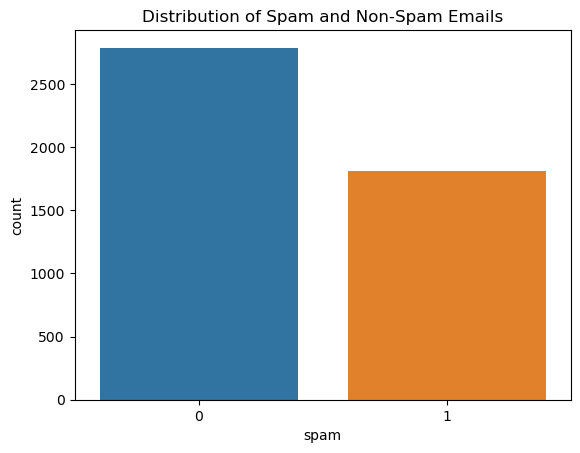

In [7]:

sns.countplot(x=data['spam'])
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()


Histograms for several features to understand distributions

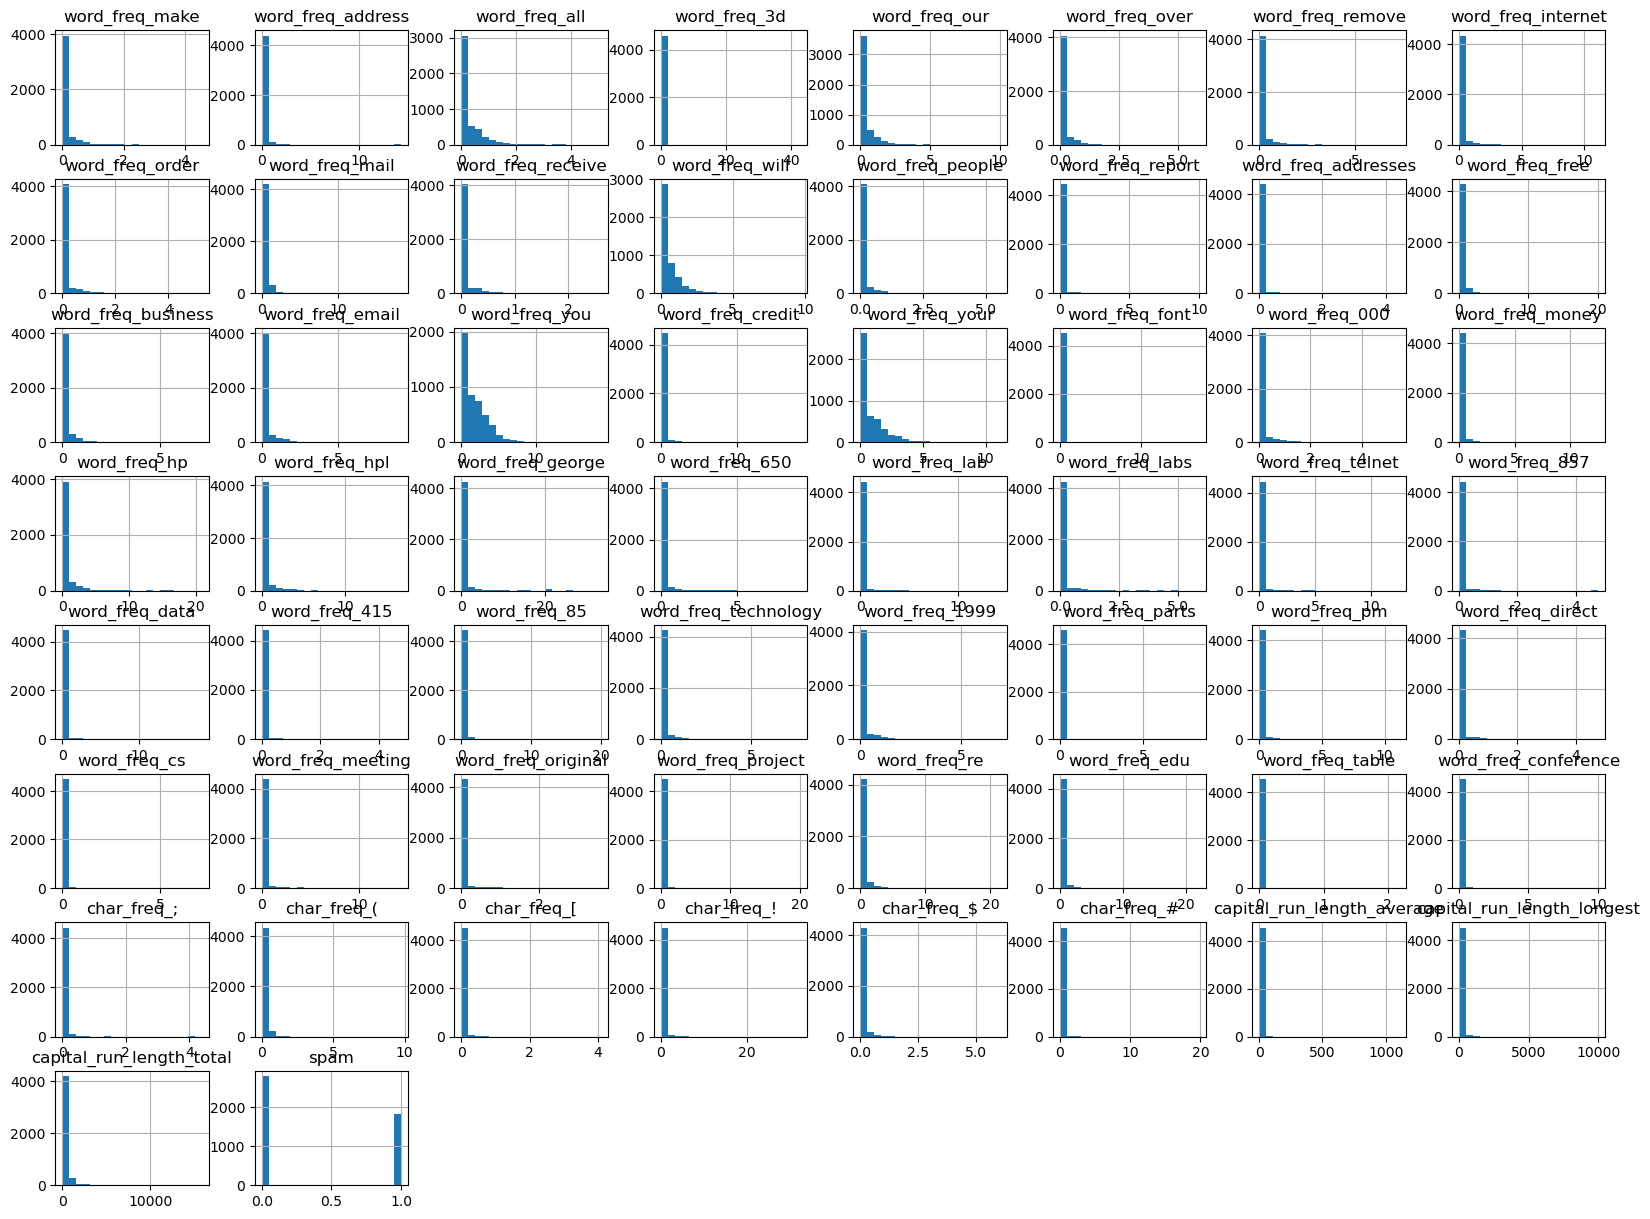

In [8]:

data.hist(bins=20, figsize=(20, 15))
plt.show()


Correlation 

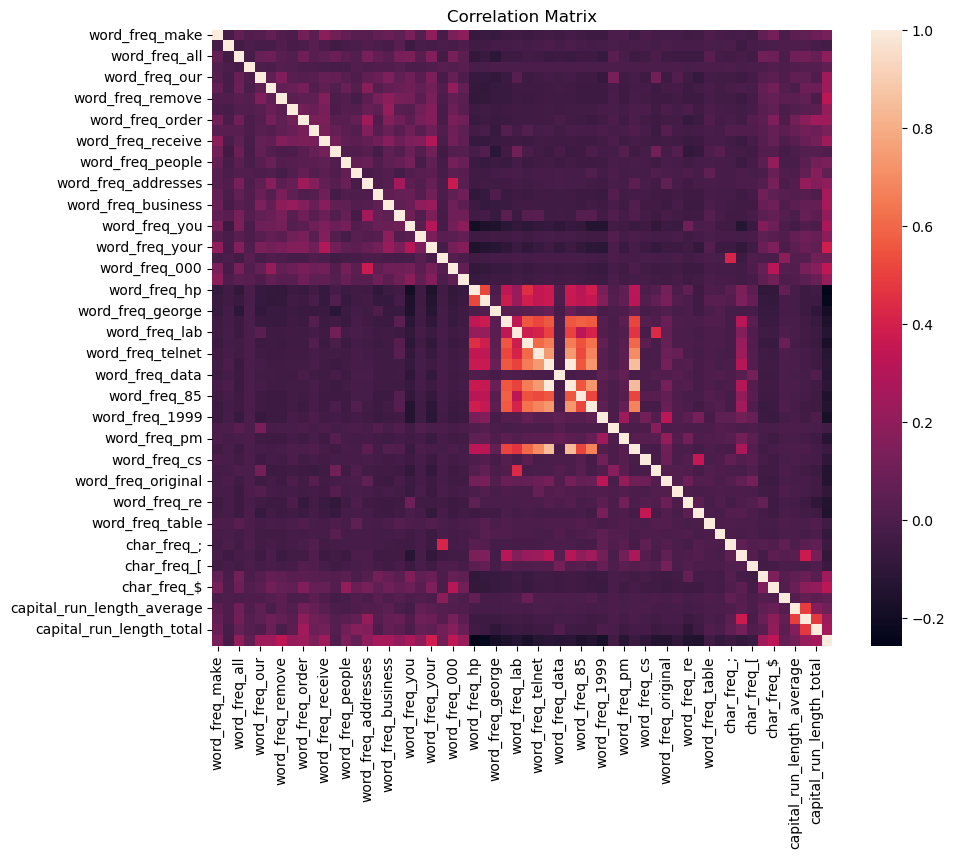

In [9]:

correlations = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False)
plt.title('Correlation Matrix')
plt.show()


# PRE-PROCESSING

Outlier Handling

In [10]:
from scipy import stats
# Calculate Z-scores of `data`
z = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z < 3).all(axis=1)]  # Keep only rows with all z-scores less than 3


In [11]:
X = data.drop('spam', axis=1)  # Adjust 'label' to the correct column name if different
y = data['spam']
import pickle
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# MODEL TRAINING

Feature Selection

In [13]:
from sklearn.feature_selection import RFECV
# Initialize the model to use in the feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object and compute a cross-validated score
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train_scaled, y_train)

# Filter the features based on the selection
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 38


# FINDING OPTIMUM PARAMETERS FOR MODELS USING GRIDSEARCH

Optimum parameters for MLPClassifier

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 100), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters for Neural Network:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Best parameters for Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}


Optimum parameters for SVM

In [ ]:
# from sklearn.svm import SVC

# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='recall', verbose=1)
# grid_search.fit(X_train, y_train)
# print("Best parameters for SVM:", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


Optimum parameters for Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree:", grid_search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for Decision Tree: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


Optimum parameters for Logistic Regression, 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\AppData\Roaming\Py

Best parameters for Logistic Regression: {'C': 1, 'solver': 'newton-cg'}


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


For Random Forest

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

# Define the parameter distribution
param_dist = {'n_estimators': randint(100, 500)}

# Setup the randomized search
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=20, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc'],
    refit='accuracy',  # Refit using the accuracy metric
    random_state=42
)

best_model = random_search.fit(X_train_scaled, y_train)



In [24]:
print("Best n_estimators:", best_model.best_estimator_.get_params()['n_estimators'])


Best n_estimators: 370


**Defining Models**

In [30]:

models = {
    "Logistic Regression": LogisticRegression(C=1, solver='newton-cg'),
    "Decision Tree": DecisionTreeClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2),
    "Random Forest": RandomForestClassifier(n_estimators=370),
    "SVM":  SVC(kernel='linear')  # You can change the kernel as needed
,
    "Neural Network": MLPClassifier(activation='tanh', hidden_layer_sizes=(100,), solver='adam')
}




Functions to store results

In [26]:
import pickle
import os
results = {
    'Model': [],
    'Feature_Selection': [],
    'Accuracy': [],
    'Precision_Spam': [],
    'Recall_Spam': [],
    'F1_Spam': []
}

# Define function to update results
def update_results(name, y_test, y_pred, feature_selection):
    from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
    report = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[1])
    results['Model'].append(name)
    results['Feature_Selection'].append(feature_selection)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision_Spam'].append(report[0][0])
    results['Recall_Spam'].append(report[1][0])
    results['F1_Spam'].append(report[2][0])
def train_evaluate_models(models, X_train, X_test, y_train, y_test, feature_selection):
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict on the test set
        y_pred = model.predict(X_test)
        # Update results
        update_results(name, y_test, y_pred, feature_selection)
        directory="./Models/"
        # Save the model to a .pickle file
        if feature_selection=='No':
            file_name = f"{name.replace(' ', '_')}_feature_selection_{feature_selection}.pickle"
            file_path=directory+file_name
            with open(file_path, 'wb') as f:
                pickle.dump(model, f)
                print(f"Model saved successfully at {file_path}")



        
        

Training model without feature selection

In [31]:
# Evaluate without feature selection
train_evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test, 'No')


Model saved successfully at ./Models/Logistic_Regression_feature_selection_No.pickle
Model saved successfully at ./Models/Decision_Tree_feature_selection_No.pickle
Model saved successfully at ./Models/Random_Forest_feature_selection_No.pickle
Model saved successfully at ./Models/SVM_feature_selection_No.pickle
Model saved successfully at ./Models/Neural_Network_feature_selection_No.pickle


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Training and Evaluation with feature selection



In [ ]:

# Evaluate with feature selection
train_evaluate_models(models, X_train_selected, X_test_selected, y_train, y_test, 'Yes')

Plotting Results of Evaluation metrics feature selection and after feature selection

In [ ]:
df_results = pd.DataFrame(results)

df_results

,Model,Feature_Selection,Accuracy,Precision_Spam,Recall_Spam,F1_Spam
0,Logistic Regression,No,0.922197,0.939189,0.847561,0.891026
1,Decision Tree,No,0.883295,0.830409,0.865854,0.847761
2,Random Forest,No,0.917620,0.905063,0.871951,0.888199
3,SVM,No,0.924485,0.939597,0.853659,0.894569
4,Neural Network,No,0.924485,0.928105,0.865854,0.895899
5,Logistic Regression,No,0.922197,0.939189,0.847561,0.891026
6,Decision Tree,No,0.881007,0.829412,0.859756,0.844311
7,Random Forest,No,0.938215,0.925466,0.908537,0.916923
8,SVM,No,0.924485,0.939597,0.853659,0.894569
9,Neural Network,No,0.935927,0.935897,0.890244,0.912500


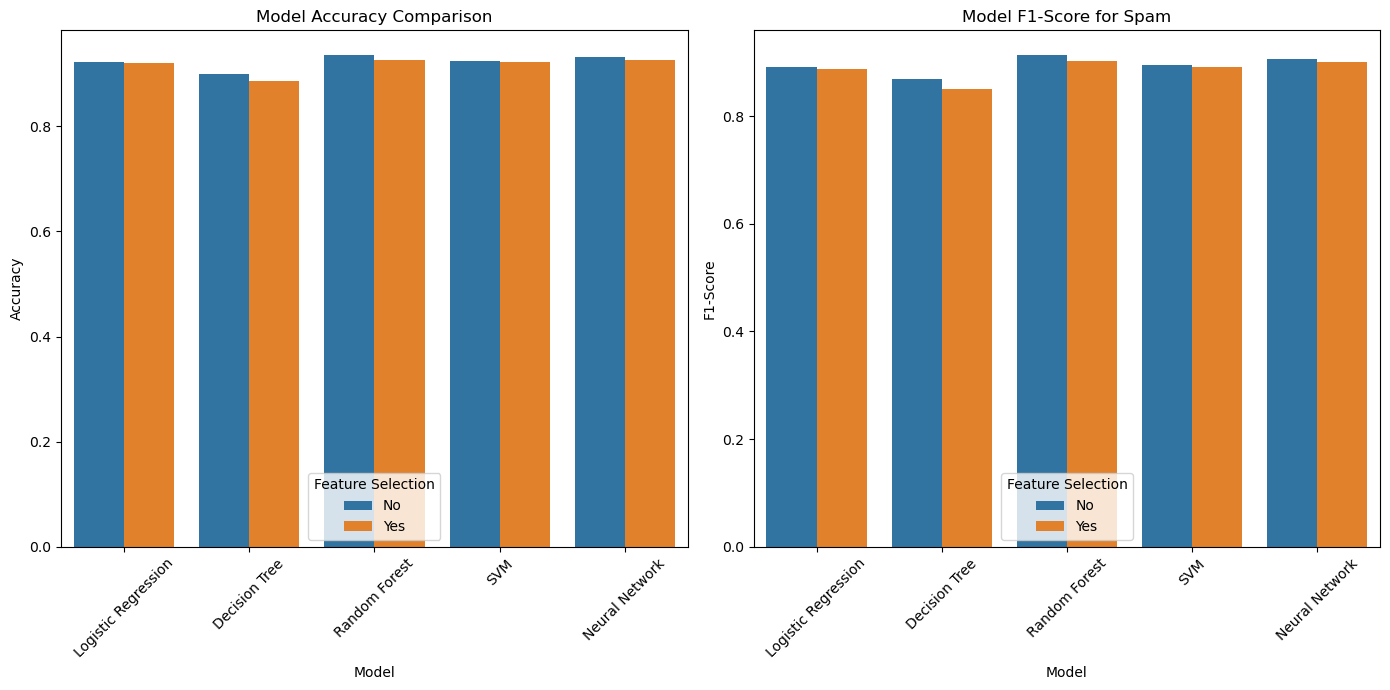

In [ ]:

# Plotting the results to compare accuracy and other metrics
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Accuracy', hue='Feature_Selection', data=df_results)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Feature Selection')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='F1_Spam', hue='Feature_Selection', data=df_results)
plt.title('Model F1-Score for Spam')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Feature Selection')

plt.tight_layout()
plt.show()


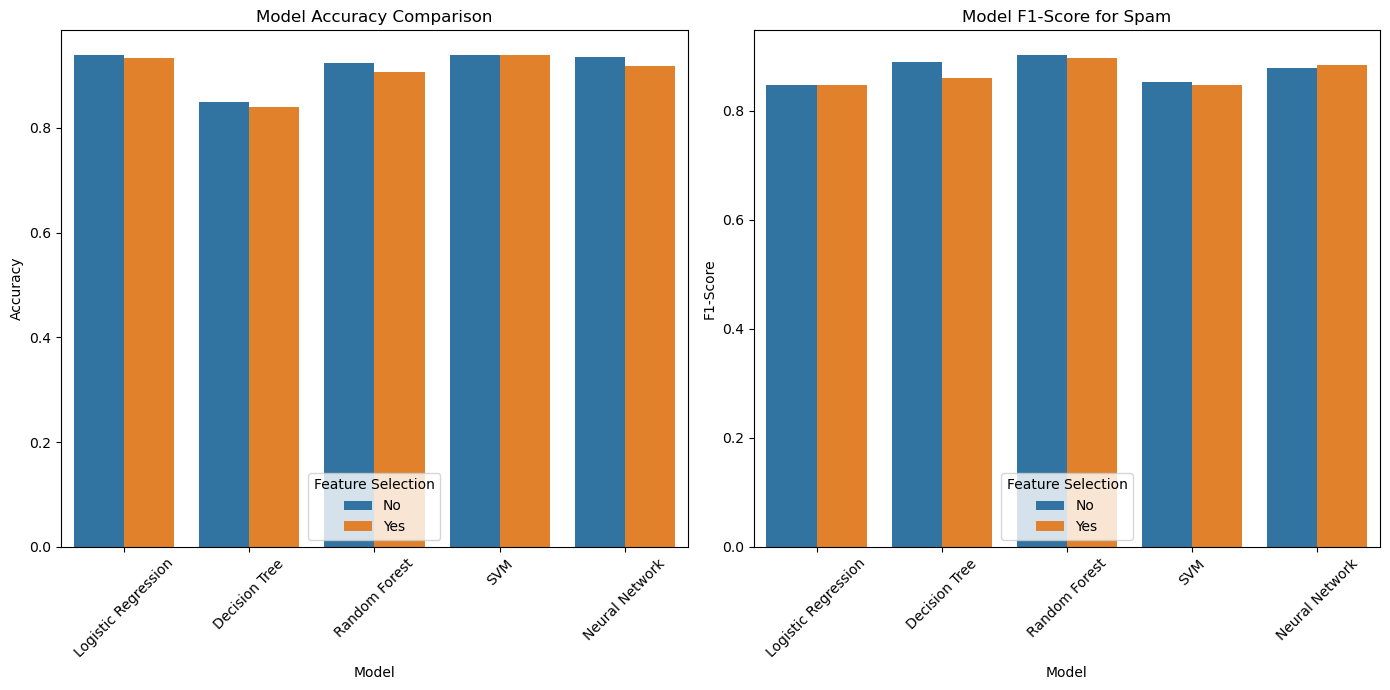

In [ ]:

# Plotting the results to compare accuracy and other metrics
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Precision_Spam', hue='Feature_Selection', data=df_results)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Feature Selection')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Recall_Spam', hue='Feature_Selection', data=df_results)
plt.title('Model F1-Score for Spam')
plt.ylabel('F1-Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Feature Selection')

plt.tight_layout()
plt.show()


By reducing features, we are not getting major improvements that is why we will be using models without feature selection

# **MAKING PREDICTIONS**

# Converting our input to data format

In [ ]:
#takes the text from an email and convert it to a vector that can be interpreted by our model 
import re
def conv(mail,columns_names,prt=False):
    vect=[]
    nb_word=len(re.findall(r'\w+',mail))
    
    #word/char freq
    mail_low=mail.lower()
    for col in columns_names[:-4]: # the last tree dont look for word/char freq
        ref=col.split("_")[2] # the columns names a in the format : word/char_freq_ref
        if ref in ["(","["]:
            ref="\\"+ref
        match_count=len(re.findall(f"({ref})",mail_low))
        if prt:
            print(ref,match_count)
        vect.append(100*match_count/nb_word)
    
    # last 3 variables
    # every sentence in capital letters
    capital =re.findall("[A-Z, ,\d,\,]{2,}",mail)
    longest=0
    sum_cap=0
    if len(capital)!=0:
        for match in capital:
            sum_cap+=len(match.replace(" ","")) # removing " " to get the total number of capital letter
            size=len(match)
            if size>longest:
                longest=size
    else :
        capital=[1]
    vect.append(sum_cap/len(capital)) # average length of uninterrupted sequences of capital letters
    vect.append(longest) # length of longest uninterrupted sequence of capital letters
    vect.append(sum_cap) # total number of capital letters in the e-mail
    
    display(pd.DataFrame(data=[vect],columns=columns_names[:-1]))
    return vect
  


In [ ]:
m = "We are thrilled to inform you that you have been selected as one of our lucky winners in this month's Mega Giveaway Contest! 🎉 You have won a brand new iPhone 13, and it's waiting for you to claim it.To claim your prize, simply click on the link below and enter your details:Click here to claim your prize!Act quickly! Your prize will only be reserved for the next 24 hours. After that, it will be passed on to the next lucky winner.Don't miss out on this once-in-a-lifetime opportunity. Imagine all the amazing photos you can take with your new iPhone. Plus, it’s completely free! Why wait? This offer is just a click away. Best regards, The Amazing Offers Team P.S. Make sure to enter your details soon, this is a limited-time offer that you won't find anywhere else!"
m2 = "You have won 1 MILLION $, please send your ADDRESS !!"
m3="how are you"
email_vector = conv(m, data.columns)  # Assuming 'data.columns' holds all feature names, adjusted for your function

# Convert the list to a DataFrame
email_df = pd.DataFrame([email_vector], columns=data.columns[:-1])


# Display the scaled vector
print(email_df)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.662252,0.0,0.662252,0.0,5.298013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.311258,0.662252,0.0,1.173913,5,27


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        0.662252                0.0       0.662252           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       5.298013             0.0               0.0                 0.0   

   word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0              0.0             0.0  ...                   0.0          0.0   

   char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0          0.0     3.311258     0.662252          0.0   

   capital_run_length_average  capital_run_length_longest  \
0                    1.173913                           5   

   capital_run_length_total  
0                        27  

[1 rows x 57 columns]


using random forest for prediction

In [ ]:
import pickle

# Load the Random Forest model from the pickle file
model_path = './Models/Random_Forest_feature_selection_No.pickle'  # Make sure the path is correct
with open(model_path, 'rb') as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


Finding Optimum Threshold for RF

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve

probabilities = model.predict_proba(X_test_scaled)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Find the threshold that maximizes the F1 score or balances your FP and FN
f1_scores = 2 * recall * precision / (recall + precision)
optimal_idx = np.nanargmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)


Optimal threshold: 0.4733333333333333


In [ ]:
# Make a prediction
email_scaled = scaler.transform(email_df)
prediction = model.predict(email_scaled)
prediction_prob = model.predict_proba(email_scaled)  # For probability of each class

# Output prediction
print("Predicted class:", prediction)
print("Probability [Not Spam, Spam]:", prediction_prob)

Predicted class: [0]
Probability [Not Spam, Spam]: [[0.5 0.5]]


In [ ]:
if prediction==1:
    print("spam")
else:
    print("not spam")

spam


If we need to use model with feature selection

In [ ]:
#  # Load the Random Forest model from the pickle file
# model_path1 = '/kaggle/working/Decision_Tree_feature_selection_Yes.pickle'  # Make sure the path is correct
# with open(model_path1, 'rb') as file:
#     model1 = pickle.load(file)

# print("Model loaded successfully!")

# email=rfecv.transform(email_scaled)
# prediction = model1.predict(email)
# prediction_prob = model1.predict_proba(email)  # For probability of each class

# # Output prediction
# print("Predicted class:", prediction)
# print("Probability [Not Spam, Spam]:", prediction_prob)

Optimal threshold: 0.4733333333333333
